In [ ]:
# Import necessary libraries
import sys
import SimpleITK as sitk
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import napari

# Local imports
sys.path.append("../")
from dataloaders.uls2023_seg import ULS2023Dataset
from augmentations.augmentations import build_augmentations

# Loading example image

In [ ]:
im = sitk.ReadImage("SegFormer3D-main/data/uls2023_seg/uls2023_raw_data/train/imagesTr/MIX_00000_0000.nii.gz")
im_np = sitk.GetArrayFromImage(im)
print("Shape of the image:", im_np.shape)

lbl = sitk.ReadImage("SegFormer3D-main/data/uls2023_seg/uls2023_raw_data/train/labelsTr/MIX_00000_0000.nii.gz")
lbl_np = sitk.GetArrayFromImage(lbl)
print("Shape of the label:", lbl_np.shape)

In [ ]:
# Different libraries may have different axis orders with the ULS dataset.
# The dataset uses nibabel, notice how it loads the data in (Y, X, Z) order
import nibabel as nib
nib_im = nib.load("SegFormer3D-main/data/uls2023_seg/uls2023_raw_data/train/imagesTr/MIX_00000_0000.nii.gz")
print(f"Shape of data in nibabel: {nib_im.shape}")

nib_lbl = nib.load("SegFormer3D-main/data/uls2023_seg/uls2023_raw_data/train/labelsTr/MIX_00000.nii.gz")
print(f"Shape of label in nibabel: {nib_lbl.shape}")

(128, 128, 64, 1)

# Visualizing Image

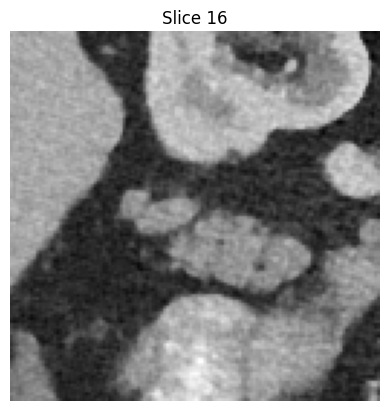

In [ ]:
# We visualize a slice from the 3D image
# slice_index indicates the z-slice to visualize
slice_index = 16
plt.imshow(im_np[slice_index, :, :], cmap='gray')
plt.title(f"Slice {slice_index}")
plt.axis('off')
plt.show()

# Testing Pre-processing

In [ ]:
import torch
label_path = "SegFormer3D-main/data/uls2023_seg/ULS2023_Training_Data/MIX_00000/MIX_00000_label.pt"
im_path = "SegFormer3D-main/data/uls2023_seg/ULS2023_Training_Data/MIX_00000/MIX_00000_im.pt"
labels = torch.load(label_path, weights_only=False)
im = torch.load(im_path, weights_only=False)
# Check the shape of the loaded tensors
print("Labels shape:", labels.shape)
print("Image shape:", im.shape)
# Label shape should be (2, 64, 128, 128) i.e (num_classes, depth, height, width)
# Image shape should be (1, 64, 128, 128) i.e (num_channels, depth, height, width)

# Testing Dataloaders

In [ ]:
# We need to change current directory because paths in CSVs are relative to the experiment
# directory.
os.chdir("../experiments/uls2023_seg/dice_experiment/")
dataset = ULS2023Dataset(
    root_dir="./data/uls2023_seg/",
    is_train=True,
    transform=build_augmentations(True),
)
print(f"Size of dataset: {dataset.__len__()}")   
# Size of dataset should be 4907

# Check the first item in the dataset
batch = dataset[0]
print(f"Image shape: {batch['image'].shape}")
print(f"Label shape: {batch['label'].shape}")
# Image shape should be (1, 64, 128, 128) i.e (num_channels, depth, height, width)
# Label shape should be (2, 64, 128, 128) i.e (num_classes, depth, height, width)